* Group 5 - Joyce Njeri, Kenneth Kipkirui, Brian Bett, Innocent Mbuvi, Michelle Nyaanga
* Instructor name: Nikita Njoroge

# Business Understanding

## Overview / Background 
The real estate market is experiencing unpredictable fluctuations in property prices. This makes it hard for prospective investors to make decisions while deciding on which properties to invest in.

## Research Question
The study aims to investigate : 

What are the top 5 best zip code areas for the American Properties Corportation to invest in?

### Stakeholder
The primary party involved in this project is **American Properties Corporation (APC)**, a real estate company. APC is a newcomer to the industry and is seeking accurate information regarding the performance of the real estate market over the years.  

The subsequent groups within the organization are particularly invested in the results of the project:
 * Top_level Management
 * Real Estate Sales Managers


# Problem Statement
The real estate market is experiencing unpredictable fluctuations in property prices. This uncertainty makes it difficult for prospective investors to make informed decisions about investing in property. The company needs to find an informed way to decide on which properties to invest in.

### Proposed Solution
To better understand the factors that influence house sales and forecast future trends, a comprehensive analysis using a predictive timeseries model is required. This model will analyze historical data and will allow prospective investors, such as The American Properties Corporation to  make informed decisions on which properties to invest in.

# Objectives

1. To analyze the zillow housing dataset, identify key patterns, trends and relatioships in the data and yeild visualizations that will aid in data-driven decisions.

1. To develop a predictive timeseries model that will forecast return on investment(ROI) of the various Zip codes.

1. To provide recommendations on factors to consider in order invest in property.




# Data Understanding 

## Data Sources

This study makes use of the Zillow House data that is contained in a CSV file, "zillow_data.csv". 

In [196]:
#importing the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error as MSE
from math import sqrt
import warnings
warnings.simplefilter('ignore')
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
plt.style.use('ggplot')
%matplotlib inline
#Time series analysis tools.
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [197]:
df = pd.read_csv("Data/zillow_data.csv")
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [198]:
df.shape

(14723, 272)

In [199]:
df.columns

Index(['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName',
       'SizeRank', '1996-04', '1996-05', '1996-06',
       ...
       '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12',
       '2018-01', '2018-02', '2018-03', '2018-04'],
      dtype='object', length=272)

In [200]:
df.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-12        int64
2018-01        int64
2018-02        int64
2018-03        int64
2018-04        int64
Length: 272, dtype: object

## Feature Categories
4 columns contain data in string format while the rest of the columns are in integer format. 

The timeseries values are stored in separate columns. 
Column 8 refers to the median housing sales values for April 1996, column 9 for May 1996, and so on. They are stored in wide format.

# Data Preparation

## Data Cleaning

In this stage the data undergoes cleaning and  preparation which involves checking for null values , dropping and renamimg columns and converting column names to date time

### Converting column names to datetime

In [201]:
#Converting column names to datetime
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')

In [202]:
get_datetimes(df)

DatetimeIndex(['1996-04-01', '1996-05-01', '1996-06-01', '1996-07-01',
               '1996-08-01', '1996-09-01', '1996-10-01', '1996-11-01',
               '1996-12-01', '1997-01-01',
               ...
               '2017-07-01', '2017-08-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01', '2018-01-01', '2018-02-01',
               '2018-03-01', '2018-04-01'],
              dtype='datetime64[ns]', length=265, freq=None)

In [203]:
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


### Checking for null values in the metro column

In [204]:
#confirm % of missing values 
df['Metro'].isna().sum()/len(df)*100

7.084154044691979

In [205]:
#Drop the missing values in Metro columns
df.dropna(subset=['Metro'], inplace=True)

 we observed that there are 220 columns containing missing values. Our primary focus is on addressing the 'Metro' column, which falls under categorical data. Out of the entire dataset comprising 14,723 rows, we found a total of 1043 missing values in the 'Metro' column.

To provide context, these missing values account for 7% of the overall dataset. Consequently, we have made the decision to remove these rows, resulting in a reduction of the total number of rows to 13,680.

Regarding the remaining 219 columns, all of which are date-related columns, we have chosen not to utilize forward or backward filling techniques in order to prevent any unintended data propagation.

### 

### Renaming Column 'RegionName'  & Dropping 'RegionID' 

In [206]:
#Renaming RegionName to ZipCode
df= df.rename(columns={"RegionName": "ZipCode"})

In [207]:
#RegionName
df['ZipCode'] = df['ZipCode'].astype('category')

In [208]:
#Drop irrelevant columns
df.drop(['RegionID'], inplace=True,axis=1)

In [209]:
#confirm dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13680 entries, 0 to 14722
Columns: 271 entries, ZipCode to 2018-04
dtypes: category(1), float64(219), int64(47), object(4)
memory usage: 29.0+ MB


In [210]:
#recheck values of missing values 
missing_counts = df.isnull().sum()
columns_with_missing = missing_counts[missing_counts > 0]
columns_with_missing

1996-04    785
1996-05    785
1996-06    785
1996-07    785
1996-08    785
          ... 
2014-02     50
2014-03     50
2014-04     50
2014-05     50
2014-06     50
Length: 219, dtype: int64

## ZipCode selection

### Ranking of the zipcodes

In [211]:
# Calculate the 25% cutoff value (1st quartile)
sr_25 = df['SizeRank'].quantile(0.25)

# Filter the dataframe for top 25% zip codes and maintain all columns
zc_top25 = df[df['SizeRank'] < sr_25]

print(f'Size Rank 25% (1st quartile) cutoff value: {sr_25}')
print(f'Amount of zipcodes: {len(zc_top25)}')

Size Rank 25% (1st quartile) cutoff value: 3429.75
Amount of zipcodes: 3420


In [212]:
zc_top25.describe()

,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,3420.000000,3.352000e+03,3.352000e+03,3.352000e+03,3.352000e+03,3.352000e+03,3.352000e+03,3.352000e+03,3.352000e+03,3.352000e+03,...,3.420000e+03,3.420000e+03,3.420000e+03,3.420000e+03,3.420000e+03,3.420000e+03,3.420000e+03,3.420000e+03,3.420000e+03,3.420000e+03
mean,1716.035965,1.341766e+05,1.342876e+05,1.344017e+05,1.345176e+05,1.346547e+05,1.348197e+05,1.350409e+05,1.353047e+05,1.356968e+05,...,3.577537e+05,3.599042e+05,3.622573e+05,3.646369e+05,3.667987e+05,3.690918e+05,3.715144e+05,3.739508e+05,3.766412e+05,3.784216e+05
std,989.505229,9.659336e+04,9.697595e+04,9.733910e+04,9.770240e+04,9.810229e+04,9.857567e+04,9.913697e+04,9.977054e+04,1.005014e+05,...,5.542335e+05,5.539177e+05,5.539229e+05,5.549442e+05,5.543869e+05,5.542422e+05,5.570150e+05,5.590417e+05,5.567036e+05,5.529246e+05
min,1.000000,2.710000e+04,2.710000e+04,2.710000e+04,2.710000e+04,2.710000e+04,2.720000e+04,2.710000e+04,2.710000e+04,2.710000e+04,...,3.270000e+04,3.350000e+04,3.440000e+04,3.520000e+04,3.600000e+04,3.730000e+04,3.880000e+04,4.000000e+04,4.090000e+04,4.090000e+04
25%,860.750000,8.550000e+04,8.567500e+04,8.587500e+04,8.600000e+04,8.610000e+04,8.630000e+04,8.650000e+04,8.657500e+04,8.680000e+04,...,1.624000e+05,1.634500e+05,1.646750e+05,1.655500e+05,1.668750e+05,1.678750e+05,1.691500e+05,1.699750e+05,1.709000e+05,1.715000e+05
50%,1716.500000,1.185000e+05,1.185000e+05,1.183000e+05,1.183000e+05,1.183500e+05,1.183500e+05,1.185500e+05,1.187000e+05,1.189000e+05,...,2.401500e+05,2.413000e+05,2.425500e+05,2.439000e+05,2.452000e+05,2.467000e+05,2.479000e+05,2.495000e+05,2.515500e+05,2.530500e+05
75%,2572.250000,1.593000e+05,1.593000e+05,1.590250e+05,1.587250e+05,1.588250e+05,1.588250e+05,1.589000e+05,1.589000e+05,1.592250e+05,...,3.892250e+05,3.903000e+05,3.929750e+05,3.953750e+05,3.971500e+05,3.978750e+05,3.993500e+05,4.022500e+05,4.070500e+05,4.104750e+05
max,3429.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,3.888900e+06,3.928800e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


We identify a subset of zip codes that fall within the top 25% based on the 'SizeRank' criterion. It can be noted that the cutt off point is 3429.75 and we end up with a total of 3420 zipcodes to work with.

The lowest zipcode is 1 , while the maximum is 3429.

Keep in mind: A zipcode with a lower value closer to 1 is regarded as a superior metric, where 1 represents the topmost ranking position.

### Calculating the Return on Investment, Standard deviation & CV

In this step, we calculate the respective ROI, std , mean and CV for our df2 and also add additional columns to the dataframe.
Each calculation analyzes real estate investment data for the different zip codes from 1996-04 to 2018-04.

* df2['ROI'] indicates the percentage increase or decrease in value of a property per each zipcode over the duration.
* df2['std'] represents the volatility or variability in property values for each zip code.
* df2 ['mean'] calculates the historical average property value for each zip code over the duration.
* df2['CV'] It assesses the risk and volatility of the investment.

In [213]:
# Assuming istorical return on investment for 'zc_top25'
zc_top25['ROI'] = (zc_top25['2018-04'] / zc_top25['1996-04']) - 1

# Calculate standard deviation of monthly values for 'zc_top25'
zc_top25['std'] = zc_top25.loc[:, '1996-04':'2018-04'].std(skipna=True, axis=1)

# Calculate historical mean value for 'zc_top25'
zc_top25['mean'] = zc_top25.loc[:, '1996-04':'2018-04'].mean(skipna=True, axis=1)

# Calculate coefficient of variance for 'zc_top25'
zc_top25['CV'] = zc_top25['std'] / zc_top25['mean']

# Show calculated values
zc_top25[['ZipCode', 'std', 'mean', 'ROI', 'CV']].head()

,ZipCode,std,mean,ROI,CV
0,60657,190821.103965,743978.867925,2.083782,0.256487
1,75070,33537.101427,219655.849057,0.365295,0.152680
2,77494,37730.794353,262110.566038,0.567966,0.143950
3,60614,231225.944628,974139.245283,1.623971,0.237364
4,79936,18167.079218,101875.471698,0.571798,0.178326


In [214]:
# Descriptive statistics of coefficients of variance for 'zc_top25'.
print(zc_top25.CV.describe())

# Define upper limit of CV according to risk profile for 'zc_top25'.
upper_cv = zc_top25.CV.quantile(.4)
print(f'\nCV upper limit: {upper_cv}')

# Get the 5 zipcodes with highest ROIs within the firm's risk profile for 'zc_top25'.
zc_best5 = zc_top25[zc_top25['CV'] < upper_cv].sort_values('ROI', axis=0, ascending=False).head(5)

print('\nBest 5 Zipcodes:')
zc_best5[['ZipCode', 'ROI', 'CV']]

count    3420.000000
mean        0.245763
std         0.093069
min         0.020461
25%         0.170113
50%         0.240001
75%         0.315854
max         0.697541
Name: CV, dtype: float64

CV upper limit: 0.20997290565687943

Best 5 Zipcodes:


,ZipCode,ROI,CV
3311,29611,1.753894,0.188013
1713,43065,1.736802,0.204892
2224,30033,1.699458,0.204701
1512,78414,1.666264,0.208588
779,29501,1.650823,0.193300


In [215]:
# Feature engineer a location column in the format "City, State"
zc_best5['location'] = zc_best5['City'] + ", " + zc_best5['State']

# Extracting the best 5 zip codes and their corresponding location names
best_5_zipcodes_with_location = zc_best5[['ZipCode','location']]
print(best_5_zipcodes_with_location)

     ZipCode            location
3311   29611      Greenville, SC
1713   43065          Powell, OH
2224   30033   North Decatur, GA
1512   78414  Corpus Christi, TX
779    29501        Florence, SC


The "Best 5 Zipcodes" section presents the top 5 zip codes namely: **Greenville SC: 29611, Powell OH: 43065, North Decatur, GA: 30033, Corpus Christi, TX: 78414 and Florence SC: 29501.** They have been identified as the prime investment locations offering highest Return on Investment (ROI) while adhering to the risk profile's CV upper limit.

The **average** CV is approximately **0.2458**, which suggests a moderate level of variability relative to the mean.The CV **upper limit** based on the risk profile is approximately **0.21**. This limit helps define a threshold for selecting zip codes with acceptable levels of risk.

For these **top 5** zip codes, the ROIs **range from 165.08% to 175.39%**, indicating substantial growth in median housing sales values over the specified time period.

The corresponding CV values for these zip codes are below the predefined upper limit, which suggests that the level of variability in these zip codes is within an acceptable risk range.

### Assessing best_5_zipcodes' ROI over various time periods

The goal is to assess how the investment has performed over different investment horizons for the best 5 zipcodes allowing us to assess the potential growth and trends in the median housing sales values.
Different investment horizons will help us make informed decisions about investment strategies and timeframes.

In [216]:
## 5 year ROI
zc_best5['ROI_allyr'] = round((zc_best5['2018-04'] - zc_best5['1996-04'])/ zc_best5['1996-04'],4)
## 3 year ROI
zc_best5['ROI_20yr'] = round((zc_best5['2018-04'] - zc_best5['1998-04'])/ zc_best5['1998-04'],4)

zc_best5['ROI_10yr'] = round((zc_best5['2018-04'] - zc_best5['2008-04'])/ zc_best5['2008-04'],4)
## 5 year ROI
zc_best5['ROI_5yr'] = round((zc_best5['2018-04'] - zc_best5['2013-01'])/ zc_best5['2013-01'],4)
## 3 year ROI
zc_best5['ROI_3yr'] = round((zc_best5['2018-04'] - zc_best5['2015-01'])/ zc_best5['2015-01'],4)

In [217]:
#Print header of final data to be utilised
zc_best5.head()

,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,ROI,std,mean,CV,location,ROI_allyr,ROI_20yr,ROI_10yr,ROI_5yr,ROI_3yr
3311,29611,Greenville,SC,Greenville,Greenville,3312,32100.0,32200.0,32300.0,32300.0,...,1.753894,10614.728217,56457.358491,0.188013,"Greenville, SC",1.7539,0.9776,0.3194,0.9601,0.6073
1713,43065,Powell,OH,Columbus,Delaware,1714,132600.0,132200.0,132100.0,132200.0,...,1.736802,54613.414789,266546.792453,0.204892,"Powell, OH",1.7368,0.9755,0.2215,0.2851,0.1891
2224,30033,North Decatur,GA,Atlanta,Dekalb,2225,129100.0,129400.0,129900.0,130400.0,...,1.699458,47361.602304,231369.433962,0.204701,"North Decatur, GA",1.6995,1.2778,0.3435,0.6270,0.3476
1512,78414,Corpus Christi,TX,Corpus Christi,Nueces,1513,82700.0,82700.0,82700.0,82700.0,...,1.666264,33868.487321,162370.566038,0.208588,"Corpus Christi, TX",1.6663,0.8375,0.1951,0.2332,0.1279
779,29501,Florence,SC,Florence,Florence,780,54700.0,54100.0,53500.0,53000.0,...,1.650823,22923.200669,118588.679245,0.193300,"Florence, SC",1.6508,0.9054,0.0853,0.1137,0.1120


In [218]:
#A summary statistic of our best 5 over periods of time
zc_best5[['ZipCode', 'location', 'ROI_allyr', 'ROI_20yr',
       'ROI_10yr', 'ROI_5yr', 'ROI_3yr']].describe()

,ROI_allyr,ROI_20yr,ROI_10yr,ROI_5yr,ROI_3yr
count,5.000000,5.000000,5.000000,5.000000,5.000000
mean,1.701460,0.994760,0.232960,0.443820,0.276780
std,0.044174,0.168444,0.103753,0.345916,0.206921
min,1.650800,0.837500,0.085300,0.113700,0.112000
25%,1.666300,0.905400,0.195100,0.233200,0.127900
50%,1.699500,0.975500,0.221500,0.285100,0.189100
75%,1.736800,0.977600,0.319400,0.627000,0.347600
max,1.753900,1.277800,0.343500,0.960100,0.607300


**ROI over 3-year Period (ROI_3yr):**

- ZipCode 29611 in Greenville, SC, has an ROI of approximately 0.6073 over the last 3 years, indicating growth of around 60.73% during this period.
- ZipCode 43065 in Powell, OH, has an ROI of approximately 0.1891 over the past 3 years, signifying growth of around 18.91%.
- ZipCode 30033 in North Decatur, GA, has an ROI of approximately 0.3476 over 3 years, indicating growth of about 34.76%.
- ZipCode 78414 in Corpus Christi, TX, has an ROI of approximately 0.1279 over the last 3 years, showing growth of about 12.79%.
- ZipCode 29501 in Florence, SC, has an ROI of approximately 0.1120 over 3 years, reflecting growth of about 11.20%,

**This suggests that the  Zipcodes experienced slow but steady growth in ROI short term.**


**ROI over Entire 22-year Period (ROI_allyr):**

- For ZipCode 29611 in Greenville, SC, the ROI over the entire 22-year period is approximately 1.7539, indicating a growth of about 175.39%. 
- For ZipCode 43065 in Powell, OH, the ROI over the same period is approximately 1.7368, reflecting a growth of about 173.68%. 
- For ZipCode 30033 in North Decatur, GA, the ROI is approximately 1.6995, signifying a growth of around 169.95%. This indicates substantial growth in the median housing sales value over the entire 22 years.
- For ZipCode 78414 in Corpus Christi, TX, the ROI is approximately 1.6663, reflecting a growth of about 166.63%. 
- For ZipCode 29501 in Florence, SC, the ROI is approximately 1.6508, indicating a growth of around 165.08%.

**This suggests that the Zipcodes experienced over 100% growth rate in ROI long term.**

# 2 EDA AND VISUALIZATION

2.1 Univariate analysis

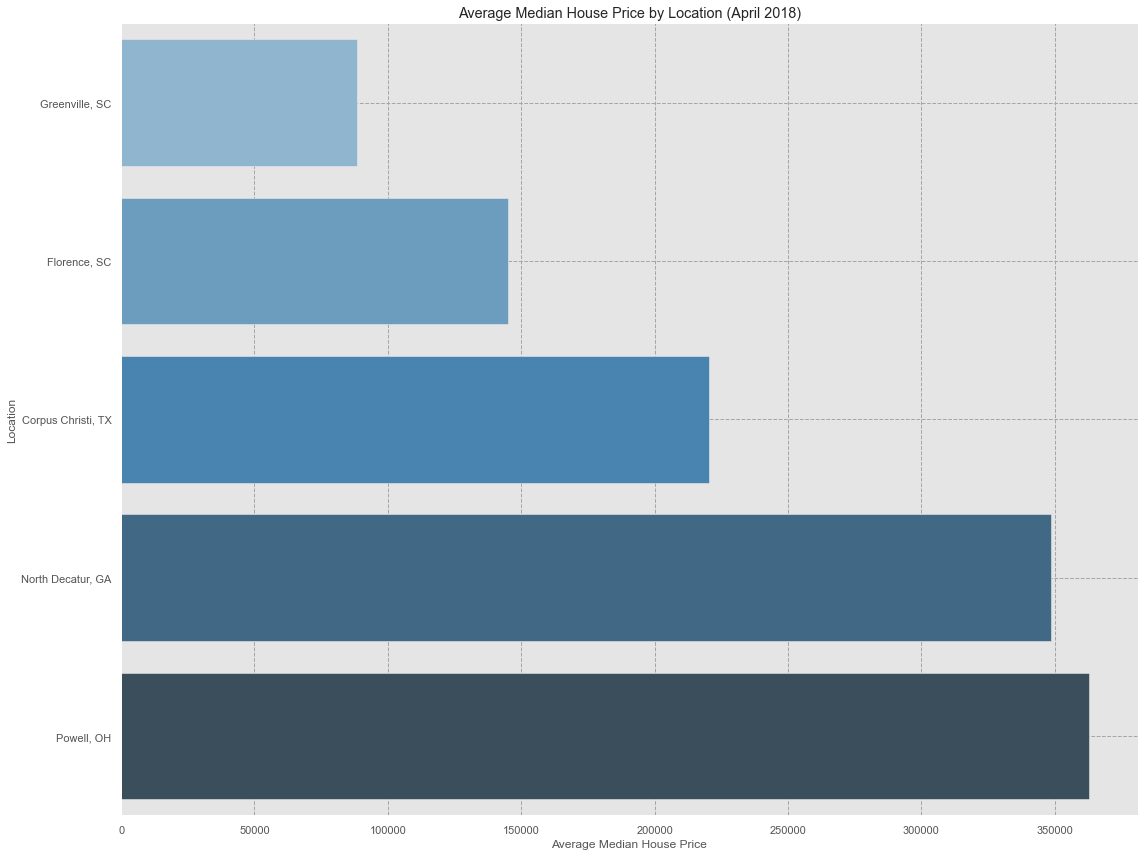

In [220]:
# Calculating the average median house price for each state in April 2018
location_price = zc_best5.groupby('location')['2018-04'].mean().sort_values()

# Reset index for easier plotting with seaborn
location_price = location_price.reset_index()

# Plotting the average median house price by state for April 2018
plt.figure(figsize=(16, 12))
sns.barplot(x='2018-04', y='location', data=location_price, palette='Blues_d')
plt.title('Average Median House Price by Location (April 2018)')
plt.xlabel('Average Median House Price')
plt.ylabel('Location')
plt.grid(True, which="both", linestyle="--", color='0.65')
plt.tight_layout()
plt.show()

Average median house price for each state

It is noticeable that Powell,OH emerges with the highest value, standing at around USD 360,000. Greenville, SC exhibits the lowest average median property price at USD 90,000.

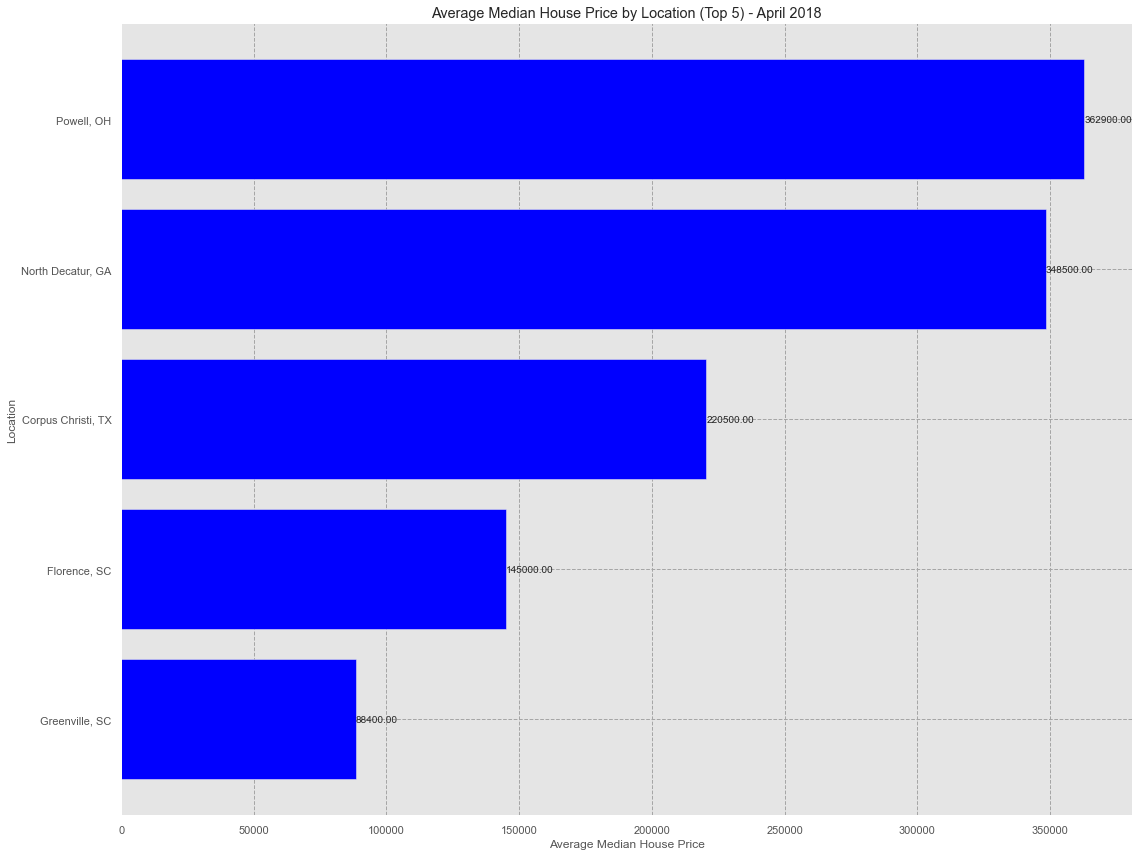

In [221]:
# Select the top 5 locations
top5_locations = zc_best5['location'].value_counts().nlargest(5).index

# Filter the data for the top 5 locations
filtered_data = zc_best5[zc_best5['location'].isin(top5_locations)]

# Calculate the average median house price for April 2018 for the top 5 locations
location_price = filtered_data.groupby('location')['2018-04'].mean().sort_values()

# Plotting the average median house price by state for April 2018
plt.figure(figsize=(16, 12))
bars = plt.barh(location_price.index, location_price.values, color='blue')
plt.title('Average Median House Price by Location (Top 5) - April 2018')
plt.xlabel('Average Median House Price')
plt.ylabel('Location')
plt.grid(True, which="both", linestyle="--", color='0.65')

# Add value labels on the bars
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.2f}',
        va='center',
        ha='left'
    )

plt.tight_layout()
plt.show()

Average median house price for each state

It is noticeable that Powell,OH emerges with the highest value, standing at around USD 362,900. Greenville, SC exhibits the lowest average median property price at USD 88,400.

The Average ROI for each location

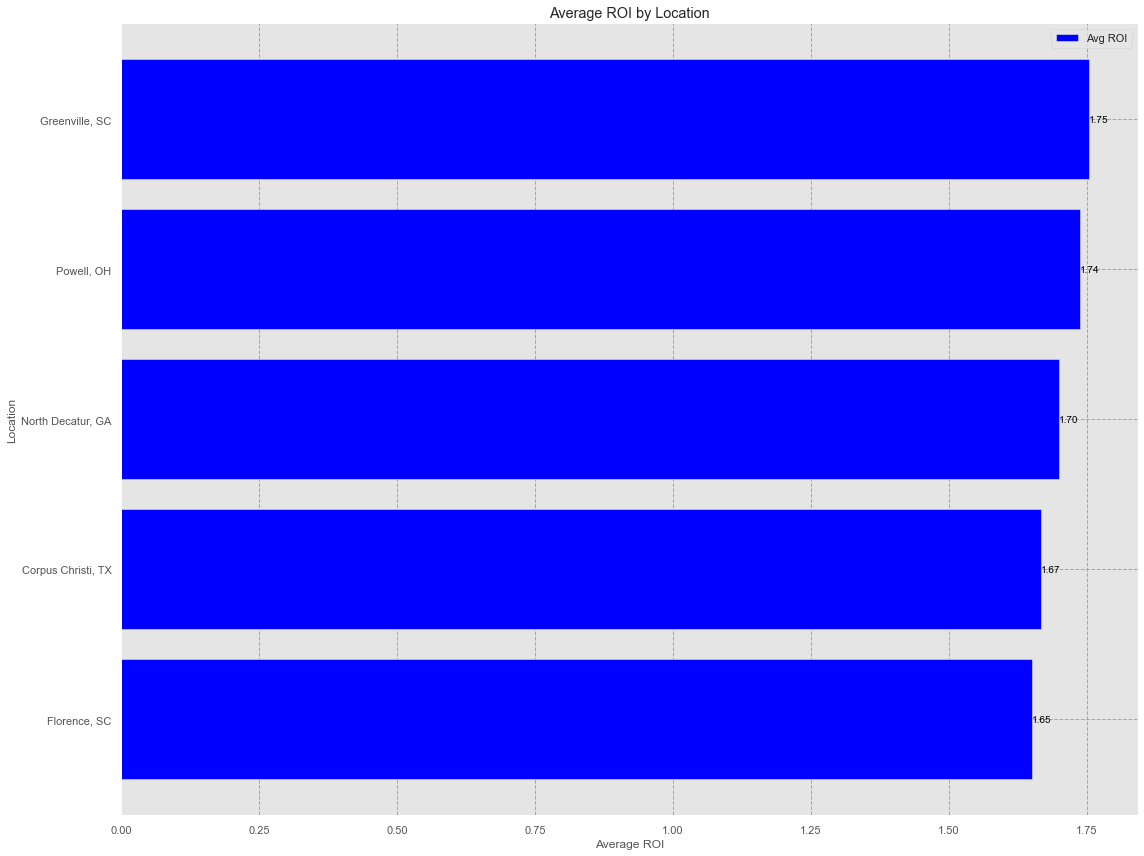

In [222]:
# Calculate the average ROI for each location
location_roi = zc_best5.groupby('location')['ROI'].mean().sort_values()

# Filter locations based on ROI (for example, select locations with positive ROI)
positive_roi_locations = location_roi[location_roi > 0]

# Plotting the average ROI by location
plt.figure(figsize=(16, 12))
bars = plt.barh(positive_roi_locations.index, positive_roi_locations.values, color='blue', label='Avg ROI')
plt.title('Average ROI by Location')
plt.xlabel('Average ROI')
plt.ylabel('Location')
plt.legend()
plt.grid(True, which="both", linestyle="--", color='0.65')

# Add value labels on the bars
for bar in bars:
    plt.text(
        bar.get_width(),
        bar.get_y() + bar.get_height() / 2,
        f'{bar.get_width():.2f}',
        va='center',
        ha='left',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()

It is noticeable that Greenville,sc emerges with the highest value, avarage ROI at 1.75. Florence, SC exhibits the lowest average ROI at 1.65.

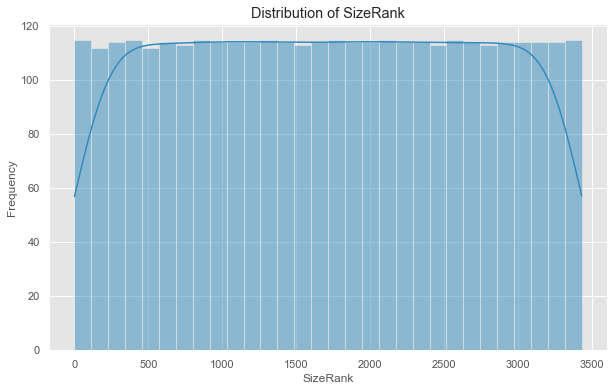

In [223]:
# Distribution of SizeRank
plt.figure(figsize=(10, 6))
sns.histplot(zc_top25['SizeRank'], bins=30, kde=True)
plt.title('Distribution of SizeRank')
plt.xlabel('SizeRank')
plt.ylabel('Frequency')
plt.show()

This histogram shows the distribution of the SizeRank variable. The SizeRank appears to be normally distributed

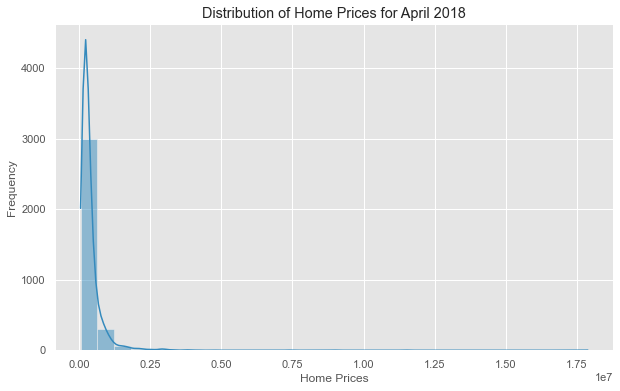

In [224]:
# Distribution of Home Prices for a Specific Month (e.g., 2018-04)
plt.figure(figsize=(10, 6))
sns.histplot(zc_top25['2018-04'], bins=30, kde=True)
plt.title('Distribution of Home Prices for April 2018')
plt.xlabel('Home Prices')
plt.ylabel('Frequency')
plt.show()

This histogram displays the distribution of home prices for April 2018. The distribution appears to be right-skewed, indicating that there are more lower-priced homes and fewer high-priced homes in the dataset.

In [225]:
# Create copy of df to calculate ROIs
roi_df = df.copy()
roi_df.head()

,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [226]:
zc_best5.columns

Index(['ZipCode', 'City', 'State', 'Metro', 'CountyName', 'SizeRank',
       '1996-04', '1996-05', '1996-06', '1996-07',
       ...
       'ROI', 'std', 'mean', 'CV', 'location', 'ROI_allyr', 'ROI_20yr',
       'ROI_10yr', 'ROI_5yr', 'ROI_3yr'],
      dtype='object', length=281)

2.2 BIVARIATE ANALYSIS

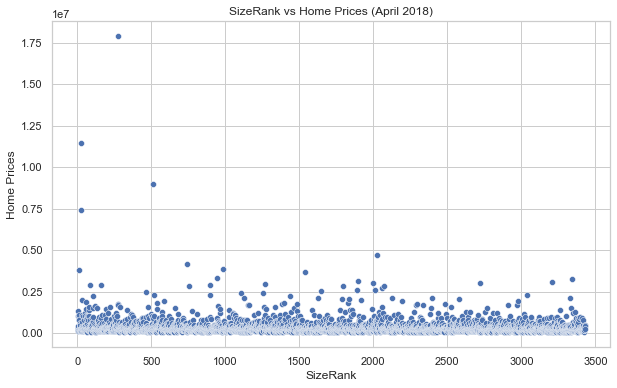

In [ ]:
# Scatter plot of SizeRank vs Home Prices (April 2018)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SizeRank', y='2018-04', data=zc_top25)
plt.title('SizeRank vs Home Prices (April 2018)')
plt.xlabel('SizeRank')
plt.ylabel('Home Prices')
plt.show()

This scatter plot shows the relationship between SizeRank and home prices for April 2018. There appears to be a negative correlation, indicating that regions with a lower SizeRank (larger regions) tend to have higher home prices.

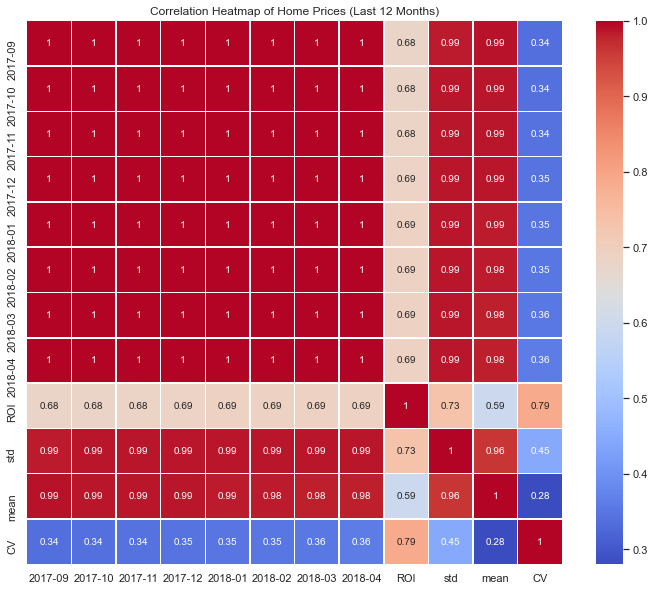

In [ ]:
# Correlation heatmap for the last 12 months
last_12_months = zc_top25.iloc[:, -12:]
corr_matrix = last_12_months.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Home Prices (Last 12 Months)')
plt.show()

This heatmap displays the correlation between home prices over the last 12 months. The high correlation values indicate that home prices are strongly correlated over time, which is expected.

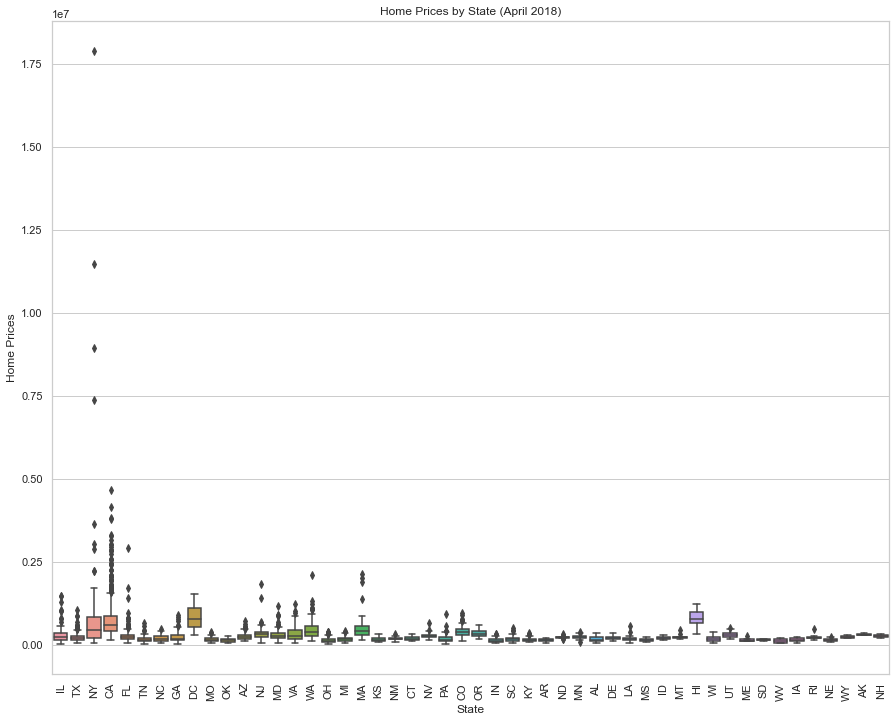

In [ ]:
# Box plot of home prices by state (using April 2018 data)
plt.figure(figsize=(15, 12))
sns.boxplot(x='State', y='2018-04', data=zc_top25)
plt.title('Home Prices by State (April 2018)')
plt.xlabel('State')
plt.ylabel('Home Prices')
plt.xticks(rotation=90)
plt.show()

This box plot shows the distribution of home prices by state for April 2018. There is significant variation in home prices across different states, with some states having much higher median home prices than others.

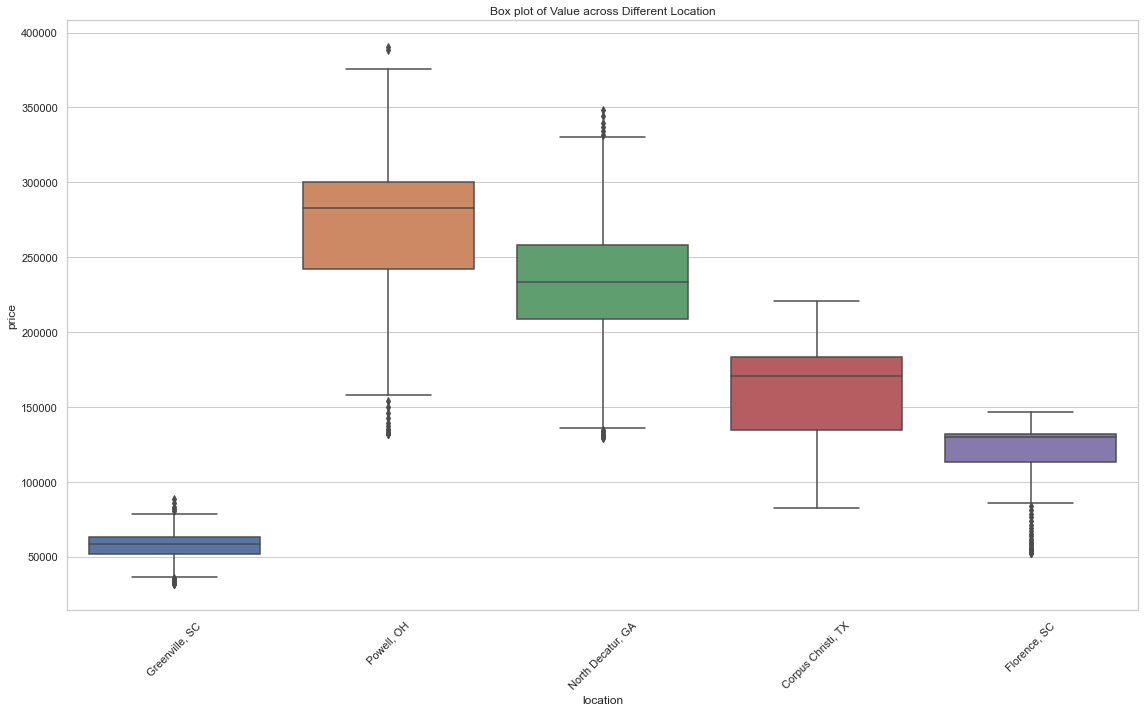

In [ ]:
# Box plots of ROI by location
# Create a box plot for price across different States
plt.figure(figsize=(16, 10))
sns.boxplot(x=melted_df['location'], y=melted_df['price'])
plt.title('Box plot of Value across Different Location')
plt.xlabel('location')
plt.ylabel('price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The box plot displays the distribution of property prices across different locations, highlighting variations in central tendency and spread. Notably, powell, oH exhibits the highest median property prices with significant variability and several high-value outliers, indicating a wide range of property values. North Decaatur, GA and Corpus Christi, TX show moderate median prices with considerable spread, suggesting diverse property values. Florence, SC and Greenville, SC have the lowest median prices, with relatively consistent property values, indicated by narrower interquartile ranges and fewer outliers. Overall, the box plot reveals significant differences in property price distributions among the locations, with Powell,OH demonstrating the highest prices and variability, the distrution is right skewed

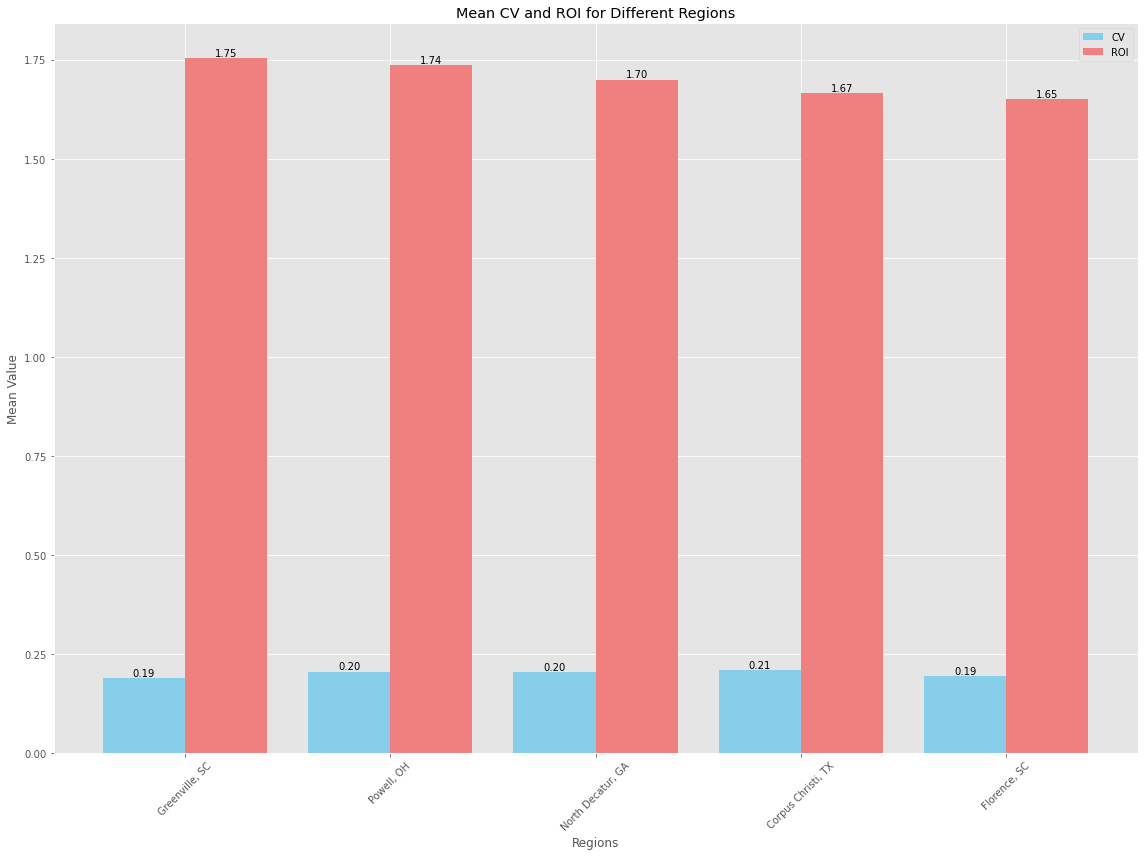

In [ ]:
# Calculate mean CV and ROI for each location
unique_regions = zc_best5['location'].unique()
cv_values = zc_best5.groupby('location')['CV'].mean().reindex(unique_regions).values
roi_values = zc_best5.groupby('location')['ROI'].mean().reindex(unique_regions).values

# Set up positions for the bars
x = np.arange(len(unique_regions))
width = 0.4

# Create the bar graph
plt.figure(figsize=(16, 12))
bar1 = plt.bar(x - width/2, cv_values, width, label='CV', color='skyblue')
bar2 = plt.bar(x + width/2, roi_values, width, label='ROI', color='lightcoral')
plt.xlabel('Regions')
plt.ylabel('Mean Value')
plt.title('Mean CV and ROI for Different Regions')
plt.xticks(x, unique_regions, rotation=45)
plt.legend()
plt.tight_layout()

# Add value labels on the bars
for bar in bar1:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

for bar in bar2:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.2f}',
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

plt.show()

The graph consistently shows that the mean ROI values are higher than the mean CV values across all regions, indicating that ROI is generally more prominent than CV in the dataset.

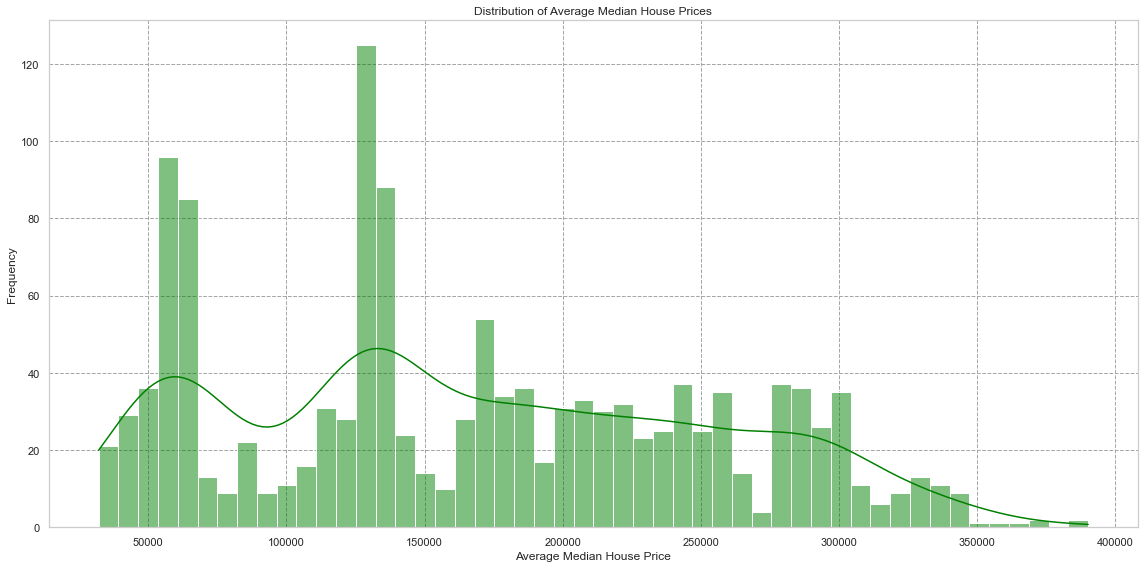

In [ ]:
# Plotting the distribution of median house prices from the sample data
plt.figure(figsize=(16, 8))
sns.histplot(melted_df['price'], bins=50, kde=True, color='green')
plt.title('Distribution of Average Median House Prices')
plt.xlabel('Average Median House Price')
plt.ylabel('Frequency')
plt.grid(True, which="both", ls="--", c='0.65')
plt.tight_layout()
plt.show()

The histogram with a KDE curve displays the distribution of average median house prices, revealing a right-skewed pattern with most properties priced between $50,000 and $150,000, and a gradual decline in frequency as prices increase.